In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
x1 = np.random.normal(loc=11, scale=2.0, size=100)
y1 = np.random.normal(loc=5, scale=3.0, size=100)

In [93]:
x2 = np.random.normal(loc=3, scale=1.5, size=75)
y2 = np.random.normal(loc=15, scale=2.0, size=75)

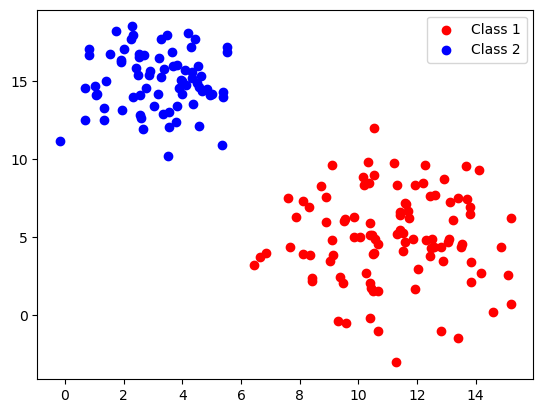

In [94]:
plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='b')
plt.legend(['Class 1', 'Class 2'])
plt.show()  

In [95]:
X = np.expand_dims(np.append(x1, x2), axis=1)
X

array([[13.81994282],
       [ 9.11934215],
       [15.1129564 ],
       [11.40727577],
       [11.32569795],
       [11.59801792],
       [13.22256644],
       [ 9.53745327],
       [ 8.73835651],
       [13.82328131],
       [13.5426885 ],
       [10.53859597],
       [14.18188785],
       [10.38896667],
       [10.66230443],
       [10.26621488],
       [11.69468124],
       [13.85246916],
       [14.11219617],
       [ 8.41525028],
       [11.29149093],
       [13.48834519],
       [10.56403151],
       [13.06667231],
       [12.25548252],
       [10.37683571],
       [12.92087079],
       [12.52373288],
       [ 9.08978655],
       [10.40381922],
       [11.41385862],
       [11.2316547 ],
       [ 8.8827395 ],
       [ 9.10248539],
       [11.93780103],
       [ 8.11198481],
       [13.68429764],
       [ 8.12525453],
       [13.08234382],
       [11.93192268],
       [ 8.90496677],
       [15.18714506],
       [ 6.43137779],
       [12.30288305],
       [14.59971359],
       [ 8

In [96]:
Y = np.expand_dims(np.append(y1, y2), axis=1)

In [97]:
data = np.concatenate((X,Y), axis=1)
data

array([[13.81994282,  6.91617137],
       [ 9.11934215,  3.83550998],
       [15.1129564 ,  2.57576707],
       [11.40727577,  5.47907794],
       [11.32569795,  5.19670522],
       [11.59801792,  4.69742438],
       [13.22256644,  6.12254713],
       [ 9.53745327,  6.18821827],
       [ 8.73835651,  8.29829657],
       [13.82328131,  2.12267222],
       [13.5426885 ,  4.54508543],
       [10.53859597,  3.95616897],
       [14.18188785,  2.67361431],
       [10.38896667, -0.16919365],
       [10.66230443, -1.02965456],
       [10.26621488,  2.68308562],
       [11.69468124,  6.70178987],
       [13.85246916,  3.40299226],
       [14.11219617,  9.33778692],
       [ 8.41525028,  2.18937057],
       [11.29149093, -3.04268832],
       [13.48834519,  4.36090047],
       [10.56403151,  4.84926817],
       [13.06667231,  4.66569319],
       [12.25548252,  9.63655786],
       [10.37683571,  8.44805836],
       [12.92087079,  8.75810599],
       [12.52373288,  4.86481349],
       [ 9.08978655,

In [98]:
def eucl_dist(p1, p2):
    return np.sqrt(np.sum((p1-p2) ** 2))

In [99]:
def random_centroids(data, K):    
    centroids = []
    #Place K centroids at random locations
    for i in range(K):
        centroid = data[np.random.randint(0, len(data))]
        centroids.append(centroid)
    return centroids

In [100]:
def assign_cluster(data, centroids):
    assignments = []

    for data_point in data:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = eucl_dist(data_point, centroid)
            dist_point_clust.append(d_clust)
        
        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments

In [101]:
def new_centroids(data, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(data)):
                if (assignments[x] == i):
                    pt_cluster.append(data[x])
        mean_c = np.mean(pt_cluster, axis=0)
        #print(mean_c)
        new_centroids.append(mean_c)

    return new_centroids

In [102]:
def kmeans(data, K, iterations):
    centroids = random_centroids(data, K)
    assignments = assign_cluster(data, centroids)
    for i in range(iterations):
        centroids = new_centroids(data, centroids, assignments, K)
        assignments = assign_cluster(data, centroids)
    return centroids, assignments

In [108]:
centroids, assignments = kmeans(data, 2, 10)
print(": ", centroids)

:  [array([ 3.15595126, 14.99001298]), array([11.15102234,  4.98578303])]


In [104]:
#Plotting   
def plot_kmeans(data, centroids, assignments, K):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(K):
        plt.scatter(centroids[i][0], centroids[i][1], marker='*', s=200, c='k')
        for x in range(len(data)):
            if (assignments[x] == i):
                plt.scatter(data[x][0], data[x][1], c=colors[i])
    plt.show()

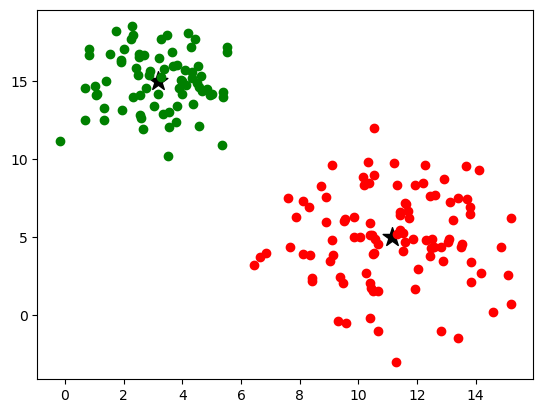

In [105]:
plot_kmeans(data, centroids, assignments, 2)